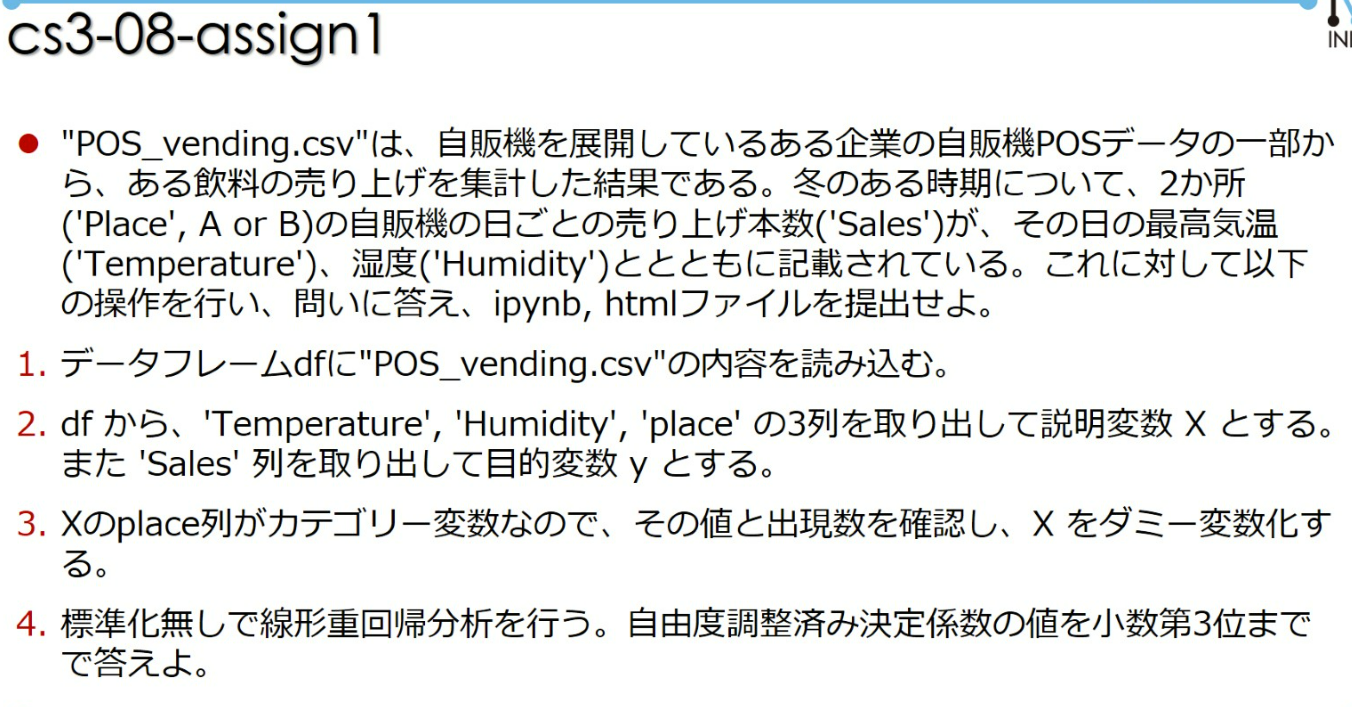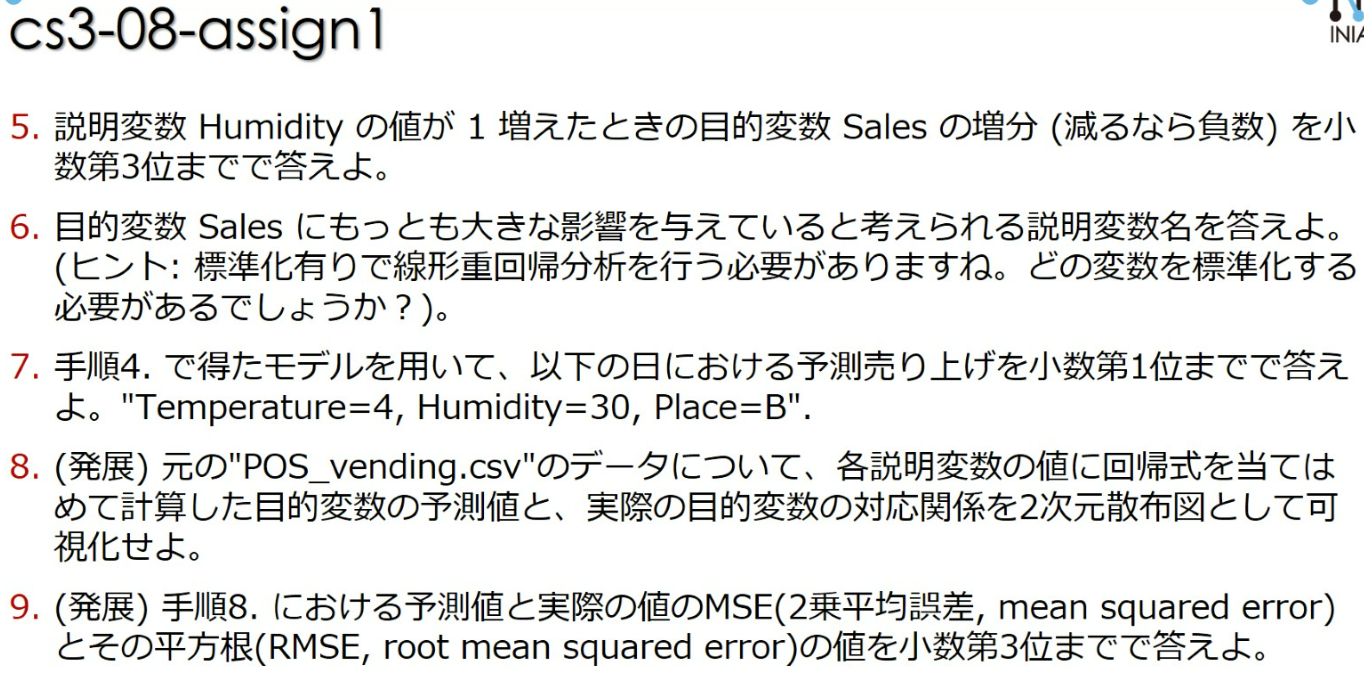

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
csv_in = 'POS_vending.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(24, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  24 non-null     int64 
 1   Humidity     24 non-null     int64 
 2   place        24 non-null     object
 3   Sales        24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes
None


,Temperature,Humidity,place,Sales
0,9,55,A,30
1,10,45,B,40
2,12,44,A,33
3,15,30,B,20
4,15,30,A,20


In [3]:
X = df[['Temperature', 'Humidity', 'place']]
y = df['Sales'] 
display(X.head())
print('y:', y.shape)
print(y.head())

,Temperature,Humidity,place
0,9,55,A
1,10,45,B
2,12,44,A
3,15,30,B
4,15,30,A


y: (24,)
0    30
1    40
2    33
3    20
4    20
Name: Sales, dtype: int64


In [4]:
print(X['place'].value_counts())

A    12
B    12
Name: place, dtype: int64


In [5]:
X_dumm = pd.get_dummies(X, drop_first=True)
print('X_dumm:', X_dumm.shape)
display(X_dumm.head())

X_dumm: (24, 3)


,Temperature,Humidity,place_B
0,9,55,0
1,10,45,1
2,12,44,0
3,15,30,1
4,15,30,0


In [6]:
X_dumm_c = sm.add_constant(X_dumm)
model = sm.OLS(y, X_dumm_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     16.32
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.34e-05
Time:                        23:57:01   Log-Likelihood:                -82.070
No. Observations:                  24   AIC:                             172.1
Df Residuals:                      20   BIC:                             176.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          66.9869      7.721      8.676      

In [7]:
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.7099706985676919
Adj R2: 0.6664663033528457


In [8]:
print(results.params)

const          66.986869
Temperature    -1.966592
Humidity       -0.420791
place_B         1.297446
dtype: float64


In [9]:
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(y)

In [10]:
X_scaled = pd.DataFrame(X_scaled_ar, columns=X_dumm.columns)
y_scaled = pd.Series(y_scaled_ar, name=y.name)
model = sm.OLS(y_scaled, X_scaled)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              17.14
Date:                Sat, 10 Jun 2023   Prob (F-statistic):                    7.36e-06
Time:                        23:57:40   Log-Likelihood:                         -19.201
No. Observations:                  24   AIC:                                      44.40
Df Residuals:                      21   BIC:                                      47.94
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [11]:
print(results_scaled.params.sort_values(key=np.abs, ascending=False))

Temperature   -0.691497
Humidity      -0.295762
place_B        0.047250
dtype: float64


In [12]:
X_test = pd.DataFrame( [[4, 30, 1]
                      ], columns=X_dumm.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,Temperature,Humidity,place_B
0,4,30,1


In [13]:
X_test_c = sm.add_constant(X_test, has_constant='add')
print('X for prediction:')
display(X_test_c)
y_test = results.predict(X_test_c)
print('Predicted y:')
print(y_test)

X for prediction:


,const,Temperature,Humidity,place_B
0,1.0,4,30,1


Predicted y:
0    47.794211
dtype: float64


In [14]:
y_pred = results.predict(X_dumm_c)
print('Predicted y:')
print(y_pred.head())

Predicted y:
0    26.144025
1    29.682790
2    24.872951
3    26.161697
4    24.864251
dtype: float64


In [15]:
y_min = np.append(y_pred, y).min()
y_max = np.append(y_pred, y).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

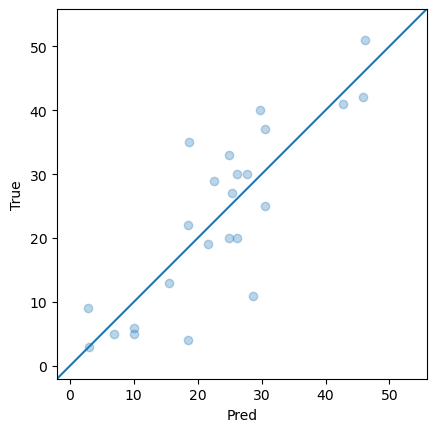

In [16]:
plt.scatter(y_pred, y, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [17]:
mse = mean_squared_error(y, y_pred)
print('MSE, RMSE:', mse, np.sqrt(mse))

MSE, RMSE: 54.67001979689732 7.393917756974128
